In [ ]:
# Import libraries

In [397]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import absolute



# Loading data train and test data

In [398]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
ids =  df_test["Id"].tolist()

# Exploratory Data Analysis

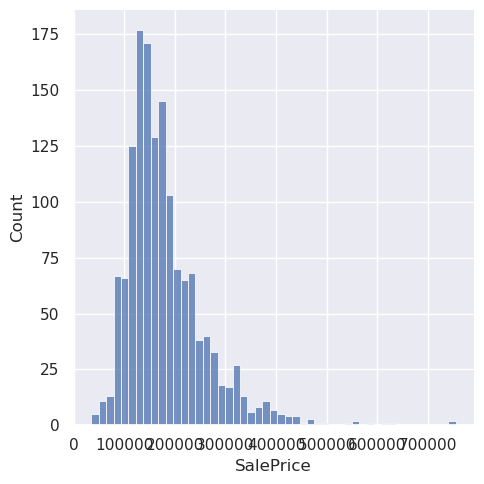

In [399]:
sns.displot(df_train['SalePrice']);
# print("Skewness: %f" % df_train['SalePrice'].skew())
# print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [400]:
corrmat = df_train.corr()
# f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);

In [401]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea',  'TotalBsmtSF', 'YearBuilt']
# sns.pairplot(df_train[cols], height = 1.5)
#plt.show();

In [402]:
# TRAIN: Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
df_train.loc[:, "Alley"] = df_train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
df_train.loc[:, "BedroomAbvGr"] = df_train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
df_train.loc[:, "BsmtQual"] = df_train.loc[:, "BsmtQual"].fillna("No")
df_train.loc[:, "BsmtCond"] = df_train.loc[:, "BsmtCond"].fillna("No")
df_train.loc[:, "BsmtExposure"] = df_train.loc[:, "BsmtExposure"].fillna("No")
df_train.loc[:, "BsmtFinType1"] = df_train.loc[:, "BsmtFinType1"].fillna("No")
df_train.loc[:, "BsmtFinType2"] = df_train.loc[:, "BsmtFinType2"].fillna("No")
df_train.loc[:, "BsmtFullBath"] = df_train.loc[:, "BsmtFullBath"].fillna(0)
df_train.loc[:, "BsmtHalfBath"] = df_train.loc[:, "BsmtHalfBath"].fillna(0)
df_train.loc[:, "BsmtUnfSF"] = df_train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
df_train.loc[:, "CentralAir"] = df_train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
df_train.loc[:, "Condition1"] = df_train.loc[:, "Condition1"].fillna("Norm")
df_train.loc[:, "Condition2"] = df_train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
df_train.loc[:, "EnclosedPorch"] = df_train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
df_train.loc[:, "ExterCond"] = df_train.loc[:, "ExterCond"].fillna("TA")
df_train.loc[:, "ExterQual"] = df_train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
df_train.loc[:, "Fence"] = df_train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
df_train.loc[:, "FireplaceQu"] = df_train.loc[:, "FireplaceQu"].fillna("No")
df_train.loc[:, "Fireplaces"] = df_train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
df_train.loc[:, "Functional"] = df_train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
df_train.loc[:, "GarageType"] = df_train.loc[:, "GarageType"].fillna("No")
df_train.loc[:, "GarageFinish"] = df_train.loc[:, "GarageFinish"].fillna("No")
df_train.loc[:, "GarageQual"] = df_train.loc[:, "GarageQual"].fillna("No")
df_train.loc[:, "GarageCond"] = df_train.loc[:, "GarageCond"].fillna("No")
df_train.loc[:, "GarageArea"] = df_train.loc[:, "GarageArea"].fillna(0)
df_train.loc[:, "GarageCars"] = df_train.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
df_train.loc[:, "HalfBath"] = df_train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
df_train.loc[:, "HeatingQC"] = df_train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
df_train.loc[:, "KitchenAbvGr"] = df_train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
df_train.loc[:, "KitchenQual"] = df_train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
df_train.loc[:, "LotFrontage"] = df_train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
df_train.loc[:, "LotShape"] = df_train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
df_train.loc[:, "MasVnrType"] = df_train.loc[:, "MasVnrType"].fillna("None")
df_train.loc[:, "MasVnrArea"] = df_train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
df_train.loc[:, "MiscFeature"] = df_train.loc[:, "MiscFeature"].fillna("No")
df_train.loc[:, "MiscVal"] = df_train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
df_train.loc[:, "OpenPorchSF"] = df_train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
df_train.loc[:, "PavedDrive"] = df_train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
df_train.loc[:, "PoolQC"] = df_train.loc[:, "PoolQC"].fillna("No")
df_train.loc[:, "PoolArea"] = df_train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
df_train.loc[:, "SaleCondition"] = df_train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
df_train.loc[:, "ScreenPorch"] = df_train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
df_train.loc[:, "TotRmsAbvGrd"] = df_train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
df_train.loc[:, "Utilities"] = df_train.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
df_train.loc[:, "WoodDeckSF"] = df_train.loc[:, "WoodDeckSF"].fillna(0)

In [403]:
# TEST: Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
df_test.loc[:, "Alley"] = df_test.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
df_test.loc[:, "BedroomAbvGr"] = df_test.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
df_test.loc[:, "BsmtQual"] = df_test.loc[:, "BsmtQual"].fillna("No")
df_test.loc[:, "BsmtCond"] = df_test.loc[:, "BsmtCond"].fillna("No")
df_test.loc[:, "BsmtExposure"] = df_test.loc[:, "BsmtExposure"].fillna("No")
df_test.loc[:, "BsmtFinType1"] = df_test.loc[:, "BsmtFinType1"].fillna("No")
df_test.loc[:, "BsmtFinType2"] = df_test.loc[:, "BsmtFinType2"].fillna("No")
df_test.loc[:, "BsmtFullBath"] = df_test.loc[:, "BsmtFullBath"].fillna(0)
df_test.loc[:, "BsmtHalfBath"] = df_test.loc[:, "BsmtHalfBath"].fillna(0)
df_test.loc[:, "BsmtUnfSF"] = df_test.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
df_test.loc[:, "CentralAir"] = df_test.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
df_test.loc[:, "Condition1"] = df_test.loc[:, "Condition1"].fillna("Norm")
df_test.loc[:, "Condition2"] = df_test.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
df_test.loc[:, "EnclosedPorch"] = df_test.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
df_test.loc[:, "ExterCond"] = df_test.loc[:, "ExterCond"].fillna("TA")
df_test.loc[:, "ExterQual"] = df_test.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
df_test.loc[:, "Fence"] = df_test.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
df_test.loc[:, "FireplaceQu"] = df_test.loc[:, "FireplaceQu"].fillna("No")
df_test.loc[:, "Fireplaces"] = df_test.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
df_test.loc[:, "Functional"] = df_test.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
df_test.loc[:, "GarageType"] = df_test.loc[:, "GarageType"].fillna("No")
df_test.loc[:, "GarageFinish"] = df_test.loc[:, "GarageFinish"].fillna("No")
df_test.loc[:, "GarageQual"] = df_test.loc[:, "GarageQual"].fillna("No")
df_test.loc[:, "GarageCond"] = df_test.loc[:, "GarageCond"].fillna("No")
df_test.loc[:, "GarageArea"] = df_test.loc[:, "GarageArea"].fillna(0)
df_test.loc[:, "GarageCars"] = df_test.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
df_test.loc[:, "HalfBath"] = df_test.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
df_test.loc[:, "HeatingQC"] = df_test.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
df_test.loc[:, "KitchenAbvGr"] = df_test.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
df_test.loc[:, "KitchenQual"] = df_test.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
df_test.loc[:, "LotFrontage"] = df_test.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
df_test.loc[:, "LotShape"] = df_test.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
df_test.loc[:, "MasVnrType"] = df_test.loc[:, "MasVnrType"].fillna("None")
df_test.loc[:, "MasVnrArea"] = df_test.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
df_test.loc[:, "MiscFeature"] = df_test.loc[:, "MiscFeature"].fillna("No")
df_test.loc[:, "MiscVal"] = df_test.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
df_test.loc[:, "OpenPorchSF"] = df_test.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
df_test.loc[:, "PavedDrive"] = df_test.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
df_test.loc[:, "PoolQC"] = df_test.loc[:, "PoolQC"].fillna("No")
df_test.loc[:, "PoolArea"] = df_test.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
df_test.loc[:, "SaleCondition"] = df_test.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
df_test.loc[:, "ScreenPorch"] = df_test.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
df_test.loc[:, "TotRmsAbvGrd"] = df_test.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
df_test.loc[:, "Utilities"] = df_test.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
df_test.loc[:, "WoodDeckSF"] = df_test.loc[:, "WoodDeckSF"].fillna(0)

In [404]:
# Some numerical features are actually really categories
df_train = df_train.replace({"MSSubClass" : {"SC20" : 20 , "SC30" : 30, "SC40" : 40, "SC45" : 45, 
                                       "SC50" : 50, "SC60" : 60, "SC70" : 70, "SC75" : 75, 
                                       "SC80" : 80, "SC85"  : 85, "SC90" : 90, "SC120" : 120, 
                                       "SC150"  : 150, "SC160" : 160, "SC180" : 180, "SC190" : 190},
                       "MoSold" : { "Jan": 1, "Feb": 2, "Mar" : 3, "Apr": 4, "May": 5, "Jun": 6,
                                   "Jul": 7, "Aug" : 8, "Sep" : 9, "Oct" : 10, "Nov": 11, "Dec": 12}
                      })
# Some numerical features are actually really categories
df_test = df_test.replace({"MSSubClass" : {"SC20" : 20 , "SC30" : 30, "SC40" : 40, "SC45" : 45, 
                                       "SC50" : 50, "SC60" : 60, "SC70" : 70, "SC75" : 75, 
                                       "SC80" : 80, "SC85"  : 85, "SC90" : 90, "SC120" : 120, 
                                       "SC150"  : 150, "SC160" : 160, "SC180" : 180, "SC190" : 190},
                       "MoSold" : { "Jan": 1, "Feb": 2, "Mar" : 3, "Apr": 4, "May": 5, "Jun": 6,
                                   "Jul": 7, "Aug" : 8, "Sep" : 9, "Oct" : 10, "Nov": 11, "Dec": 12}
                      })

In [405]:
# Encode some categorical features as ordered numbers when there is information in the order
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

# Encode some categorical features as ordered numbers when there is information in the order
df_test = df_test.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [406]:
# TRAIN: Differentiate numerical features (minus the target) and categorical features
categorical_features = df_train.select_dtypes(include = ["object"]).columns
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
numerical_features = numerical_features.drop("Id")

df_train_num = df_train[numerical_features]
df_train_cat = df_train[categorical_features]

# TEST: Differentiate numerical features (minus the target) and categorical features
categorical_features_test = df_test.select_dtypes(include = ["object"]).columns
numerical_features_test = df_test.select_dtypes(exclude = ["object"]).columns
# numerical_features_test = numerical_features_test.drop("SalePrice")
numerical_features_test = numerical_features_test.drop("Id")
df_test_num = df_test[numerical_features_test]
df_test_cat = df_test[categorical_features_test]


In [407]:
# Handle remaining missing values for numerical features by using median as replacement
df_train_num = df_train_num.fillna(df_train_num.median())
df_test_num = df_test_num.fillna(df_test_num.median())

In [408]:
# Create dummy features for categorical values via one-hot encoding
df_train_cat = pd.get_dummies(df_train_cat)
df_train_cat = df_train_cat.fillna(0)
cols = df_train_cat.columns.tolist()

# Replicate same columns for TEST set as well

df_test_cat = pd.get_dummies(df_test_cat)
df_test_cat = df_test_cat.reindex(columns=cols).fillna(0)


In [409]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed

#TRAIN

skewness = df_train_num.apply(lambda x: stats.skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_train_num[skewed_features] = np.log1p(df_train_num[skewed_features])

# TEST

skewness = df_test_num.apply(lambda x: stats.skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_test_num[skewed_features] = np.log1p(df_test_num[skewed_features])

44 skewed numerical features to log transform
40 skewed numerical features to log transform


In [410]:
# Log transform the target for official scoring
df_train.SalePrice = np.log1p(df_train.SalePrice)
y = df_train.SalePrice

In [411]:
# Join categorical and numerical features

df_train = pd.concat([df_train_num, df_train_cat], axis = 1)
# df_train = pd.concat([df_train_num, train_enc], axis = 1)
df_train.head()
print("New number of TRAIN features : " + str(df_train.shape[1]))

df_test = pd.concat([df_test_num, df_test_cat], axis = 1)
# df_test = pd.concat([df_test_num, test_enc], axis = 1)
print("New number of TEST features : " + str(df_test.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.3, random_state = 0)
# print("X_train : " + str(X_train.shape))
# print("X_test : " + str(X_test.shape))
# print("y_train : " + str(y_train.shape))
# print("y_test : " + str(y_test.shape))

New number of TRAIN features : 231
New number of TEST features : 231


In [412]:
# # Standardize numerical features
# stdSc = StandardScaler()
# X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
# X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])
# RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)[source]

# print(X_train.columns.tolist())
# print(pd.DataFrame(X_train).head())

test_scaler = RobustScaler().fit(X_train)
X_train = test_scaler.transform(X_train)

X_test = test_scaler.transform(X_test)

df_test = test_scaler.transform(df_test)


In [413]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)



RMSE on Training set : 0.12993287816787785
RMSE on Test set : 0.14154848428553163


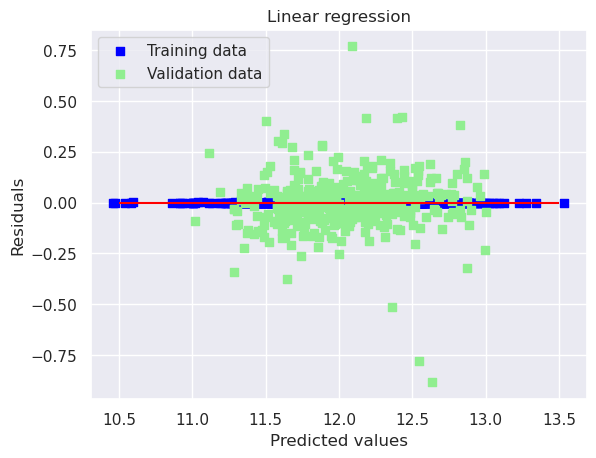

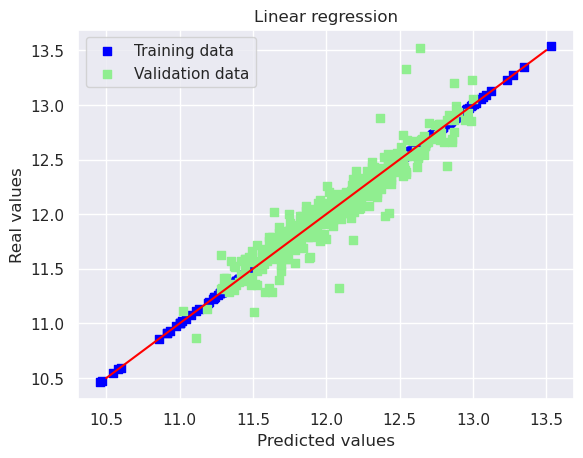

In [419]:
# Linear Regression
# lr = LinearRegression()
# lr = Lasso(alpha=0.1)
# lr = LassoCV(cv=5, random_state=0)
# lr= ElasticNetCV(l1_ratio=0.1, eps=.001, max_iter=100000)
# lr = Ridge(alpha=1)

params_grad_boost_regressor = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

# lr = RandomForestRegressor(max_depth=2, random_state=0)
# lr = GradientBoostingRegressor(**params_grad_boost_regressor)
lr = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# lr = XGBRegressor()
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
# scores = absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

lr.fit(X_train, y_train)


# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
# print(pd.DataFrame(y_train_pred))

d = {'SalePrice': np.exp(y_train_pred)-1} #'Id': test_ids.index,
pre_train_submission = pd.DataFrame(data=d)
# print('train submission', pre_train_submission)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [420]:
# test_ids = X_test['Id']
# print(X_test)
# print(test_ids)

test_pred = lr.predict(X_test)
print(pd.DataFrame(test_pred))
# submission = pd.concat([test_ids, pd.Series(test_pred, name='SalePrice')], axis=1)
d = {'SalePrice': np.exp(test_pred)-1} #'Id': test_ids.index,
pre_submission = pd.DataFrame(data=d)
pre_submission

             0
0    12.253171
1    11.860464
2    11.668009
3    12.284971
4    11.450043
..         ...
433  12.204791
434  11.957896
435  12.771652
436  12.244338
437  12.544653

[438 rows x 1 columns]


,SalePrice
0,209644.015625
1,141556.906250
2,116774.531250
3,216417.906250
4,93904.343750
...,...
433,199742.859375
434,156043.453125
435,352092.562500
436,207800.390625


In [421]:
# test_ids_submission = df_test['Id']
# print(X_test)
# print(test_ids)

test_pred_submission = lr.predict(df_test)
print(pd.DataFrame(test_pred_submission))
# test_pred_submission = np.log1p(test_pred_submission)
# print(pd.DataFrame(test_pred_submission, index=test_ids_submission.index))
# submission = pd.concat([test_ids, pd.Series(test_pred, name='SalePrice')], axis=1)
d = {'Id': ids, 'SalePrice': np.exp(test_pred_submission)-1} #'Id': test_ids_submission.index, 
submission = pd.DataFrame(data=d)
submission

              0
0     11.750784
1     12.062090
2     12.185055
3     12.211200
4     12.263126
...         ...
1454  11.425624
1455  11.487601
1456  11.959608
1457  11.760519
1458  12.352801

[1459 rows x 1 columns]


,Id,SalePrice
0,1461,126851.960938
1,1462,173179.546875
2,1463,195839.281250
3,1464,201027.046875
4,1465,211741.546875
...,...,...
1454,2915,91639.070312
1455,2916,97498.375000
1456,2917,156310.812500
1457,2918,128092.914062


In [422]:
submission.to_csv('/kaggle/working/submission.csv', index=False, header=True)